#   Aim: Implement linear regression in Python on a given dataset.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

C:\Users\nayan\AppData\Local\Temp\ipykernel_2876\2785943950.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#data_no=pd.read_csv('Automobile.csv')
#df = pd.DataFrame()
d = pd.read_csv("Automobile.csv")

In [4]:
d

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70,usa
1,buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70,usa
2,plymouth satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70,usa
3,amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0,70,usa
4,ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,70,usa
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4.0,140.0,86.0,2790.0,15.6,82,usa
394,vw pickup,44.0,4.0,97.0,52.0,2130.0,24.6,82,europe
395,dodge rampage,32.0,4.0,135.0,84.0,2295.0,11.6,82,usa
396,ford ranger,28.0,4.0,120.0,79.0,2625.0,18.6,82,usa


In [5]:
d.isnull().sum()

name            0
mpg             1
cylinders       1
displacement    5
horsepower      7
weight          5
acceleration    2
model_year      2
origin          1
dtype: int64

In [6]:
X = d.iloc[:,3:4]
Y = d.iloc[:,4:5]

In [7]:
X=X.fillna(192.393130)
Y=Y.fillna(104.524297)

In [8]:
Y.shape

(398, 1)

In [9]:
X.shape


(398, 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2)

In [11]:
Y_test.shape

(160, 1)

In [12]:
X_test

,displacement
94,440.0
32,98.0
279,98.0
178,120.0
354,100.0
...,...
23,121.0
241,146.0
1,350.0
169,232.0


In [13]:
d.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,397.000000,397.000000,393.000000,391.000000,393.000000,396.000000
mean,23.538539,5.458438,192.393130,104.524297,2949.053435,15.671970
std,7.811191,1.701577,103.205814,38.525101,851.576054,3.961926
min,9.000000,3.000000,68.000000,46.000000,15.000000,0.500000
25%,17.500000,4.000000,105.000000,75.000000,2220.000000,13.775000
50%,23.000000,4.000000,146.000000,94.000000,2790.000000,15.500000
75%,29.000000,8.000000,260.000000,127.000000,3570.000000,17.225000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,70.000000


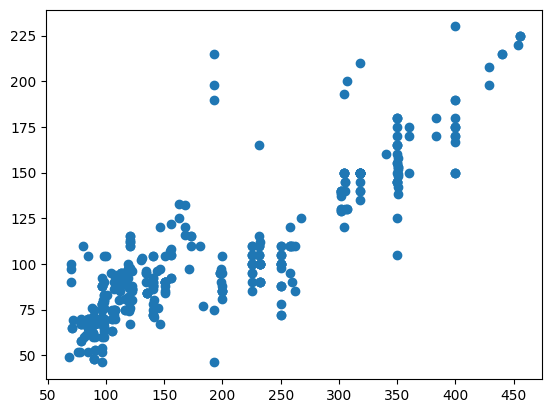

In [14]:
plt.scatter(X,Y) 
#plotting X & Y data on graph

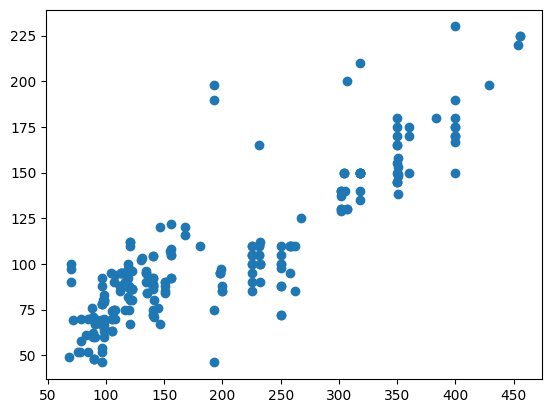

In [15]:
plt.scatter(X_train,Y_train)
#plotting training data on graph

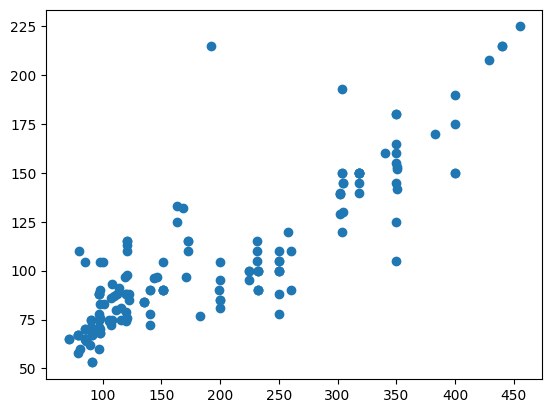

In [16]:
plt.scatter(X_test,Y_test)
#plotting testing data on graph


In [17]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
Y_pred
#plt.scatter(X_train,Y_train)

array([[186.21884605],
       [ 72.92037693],
       [ 72.92037693],
       [ 80.20858255],
       [ 73.58294108],
       [104.19112876],
       [182.57474325],
       [145.80243309],
       [156.40345944],
       [123.2752521 ],
       [101.07935317],
       [ 80.53986462],
       [ 70.60140241],
       [117.31217477],
       [ 66.62601753],
       [ 75.90191559],
       [123.2752521 ],
       [ 80.20858255],
       [ 67.28858168],
       [145.80243309],
       [ 75.90191559],
       [141.49576614],
       [ 72.58909486],
       [ 80.20858255],
       [172.96756312],
       [141.49576614],
       [ 76.89576181],
       [ 97.10396829],
       [ 80.20858255],
       [140.50191992],
       [ 72.58909486],
       [ 76.23319766],
       [106.37986635],
       [ 72.58909486],
       [186.21884605],
       [ 68.61370997],
       [116.9808927 ],
       [ 63.97576095],
       [141.16448406],
       [ 68.61370997],
       [114.99320026],
       [117.31217477],
       [123.2752521 ],
       [ 72

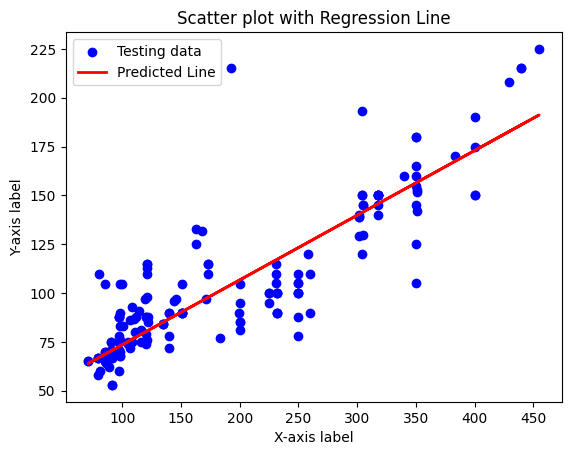

In [18]:
# Plotting the scatter plot
plt.scatter(X_test, Y_test, color='blue', label='Testing data')

# Plotting the regression line with predicted values
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Predicted Line')

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter plot with Regression Line')

plt.legend()

plt.show()


In [21]:
lr.score(X_train, Y_train)

0.7579028942658471

In [22]:
Y_pred=lr.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
mean_absolute_error(Y_test, Y_pred)

13.070989131325026

In [23]:
mean_squared_error(Y_test, Y_pred)

367.74996277773056

In [24]:
root_mean_squared_error(Y_test, Y_pred)

19.176807940262908

In [25]:
r2=r2_score(Y_test, Y_pred)
r2

0.7345525423105541

In [26]:
n=398
k=1
adj_r2score = 1 - (((1-r2)*(10-n))/ (10-n-k))
print(adj_r2score)

0.7352349265205527
